## Google Play Store Apps

## Motivation
An entruprenuer has approached us with the intention of investing in a new mobile application.
The requirements are to find unstaturated markets where there is the least amount of competition.
To do this, we will attempt to filter out all categories who's market share is less than 5%
We will then proceed to filter out five categories who's average rating is the lowest.
Then we will further filter out categories with substantially low number of installations.

To conclude,  we will provide the recommended categories to invest in, price, content rating and size.
We also provide a word cloud from all the application names to help with the branding.

### Data Exploration

In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [96]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Here we load our app store data using pandas and print a sample of the data so that we can become more familiar with it.
store = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')
store.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8305,"CallApp: Caller ID, Blocker & Phone Call Recorder",COMMUNICATION,4.4,483782,20M,"10,000,000+",Free,0,Everyone,Communication,"July 29, 2018",1.286,4.1 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
5416,PES 2018 PRO EVOLUTION SOCCER,SPORTS,4.4,1721943,26M,"10,000,000+",Free,0,Everyone,Sports,"June 27, 2018",2.3.2,5.0 and up
10291,FD VR Player - for 360 Youtube,FAMILY,3.9,100,9.1M,"10,000+",Free,0,Everyone,Entertainment,"November 30, 2016",3.6.1,4.4 and up
4185,H&M,LIFESTYLE,3.7,41917,14M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 30, 2018",9.6.3,4.4 and up
745,NeuroNation - Focus and Brain Training,EDUCATION,4.5,248555,Varies with device,"5,000,000+",Free,0,Everyone,Education;Brain Games,"May 23, 2018",Varies with device,4.0.3 and up
7841,My Nexus for CS:S & CS:GO,FAMILY,3.6,783,25M,"50,000+",Free,0,Teen,Entertainment,"June 25, 2016",1.3.4,4.0 and up
5131,Freeland AH,MEDICAL,NaN,0,28M,100+,Free,0,Everyone,Medical,"December 18, 2017",300000.0.95,4.0.3 and up
2201,DreamWorks Friends,FAMILY,3.6,1042,48M,"100,000+",Free,0,Everyone,Role Playing;Pretend Play,"August 4, 2017",2.5,4.3 and up
10579,Fish|Hunt FL,LIFESTYLE,3.6,853,34M,"100,000+",Free,0,Everyone,Lifestyle,"March 22, 2018",3.2.0,4.1 and up


In [97]:
# Here we inspect the dimensions of the data set
store.shape

(10841, 13)

In [98]:
#  Here we are inspecting column data types. It is clear that several column type needs to be converted. 
#  Fields such as 'Price' and 'Installs' and 'Size' and 'Last Updated'.
#  We will create these type conversiona in the next blocks
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning

### Last Updated

In [99]:
# Here we update the 'Last Updated' type from 'object' to 'datetime'
store['Last Updated'] = pd.to_datetime(store['Last Updated'], format='mixed', errors='coerce')
store['Last Updated'].unique()

<DatetimeArray>
['2018-01-07 00:00:00', '2018-01-15 00:00:00', '2018-08-01 00:00:00',
 '2018-06-08 00:00:00', '2018-06-20 00:00:00', '2017-03-26 00:00:00',
 '2018-04-26 00:00:00', '2018-06-14 00:00:00', '2017-09-20 00:00:00',
 '2018-07-03 00:00:00',
 ...
 '2015-11-23 00:00:00', '2012-06-17 00:00:00', '2015-02-27 00:00:00',
 '2013-12-18 00:00:00', '2012-02-06 00:00:00', '2014-11-25 00:00:00',
 '2016-05-19 00:00:00', '2014-01-20 00:00:00', '2014-02-16 00:00:00',
 '2014-03-23 00:00:00']
Length: 1378, dtype: datetime64[ns]

### Price

In [100]:
# Here we progress to clean up the column price to float without dollar sign
# We also found that there were stray records with 'Everyone' in the Price column, we need to delete these too.

store = store[store['Price'] != 'Everyone']
store['Price'] = store['Price'].str.replace('$', '')
store['Price'] = store['Price'].str.replace(' ', '0')
store['Price'] = store['Price'].str.replace(',', '')
store['Price'] = store['Price'].astype(float)
store.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

### Installs

In [101]:
#  Here we progress to clean up the 'Installs' column to float without dollar and plus sign
items_mude = ['+',',','$']
cols = ['Installs']

for item in items_mude:
    for col in cols:
        store['Installs'] = store[col].str.replace(item, '')

store['Installs'] = store['Installs'].astype(float)
store.Installs.unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

### Size

In [102]:
# Here we seek to clean the data in the size to megabytes

# Replace 'M' with '000', remove 'k', replace 'Varies with device' with NaN
store['Size'] = store['Size'].str.replace('M', '000').str.replace('k', '').replace('Varies with device', np.nan)

# Remove non-numeric characters (except '.')
store['Size'] = store['Size'].replace('[^\d.]', '', regex=True)

# Convert to numeric, errors='coerce' will replace non-convertible values with NaN
store['Size'] = pd.to_numeric(store['Size'], errors='coerce')

# Replace NaN with 0
store['Size'] = store['Size'].fillna(0)

for i in store['Size']:
    if i < 10:
        store['Size']=store['Size'].replace(i,i*1000)
store['Size']=store['Size']/1000

store.Size.unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01, 0.00e+00,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e

In [103]:
# We show how many empty cells there are in each column
print(store.shape)
store.isna().sum()

(10840, 13)


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [104]:
# We continue and drop all rows with empty Rating values, Current version and Android version 
# We are not concerned with losing this data since we want to consider only applications that are well defined and that have ratings.
store = store.dropna()

In [105]:
# Here we can see that now each column does not any empty values
# We can also see that we successfully removed 1481 applications from our dataset
print(store.shape)
store.isna().sum()

(9360, 13)


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Data Analysis

### Category Distribution

### A bar chart showing number of applications per cateogry on the store

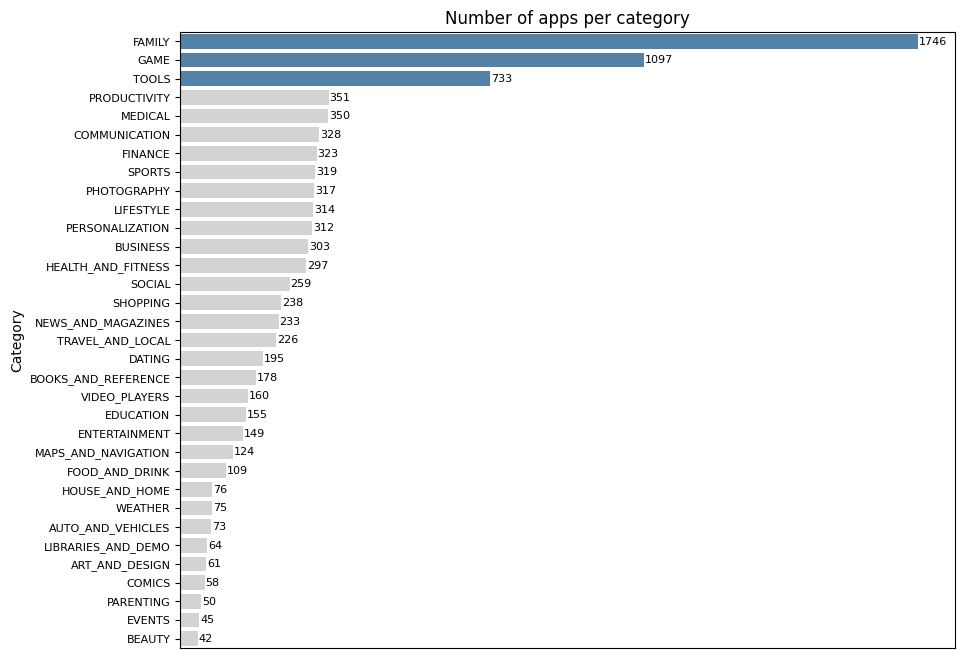

In [106]:
# Here we create a bar chart showing the number of applications per category 
category = store['Category'].value_counts()

top3_cat = category.index[:3]
colors = ['steelblue' if cat in top3_cat else 'lightgray' for cat in category.index]

plt.figure(figsize=(10,8))
sns.barplot(y=category.index,x=category.values, orient='h', palette=colors)

for index, value in enumerate(category.values):
    plt.text(value + 2, index, str(value), fontsize=8, va='center')

plt.title('Number of apps per category', size=12)
plt.yticks(fontsize=8)
plt.xticks([])

plt.show()

### A Pie chart showing number of applications per category in percentage

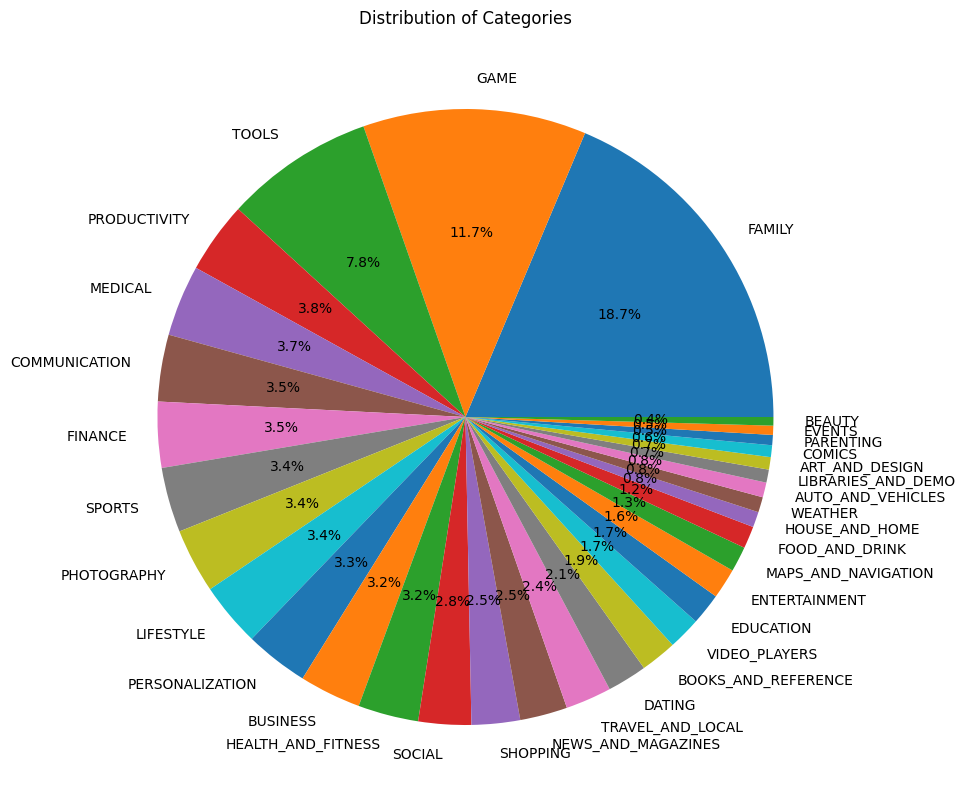

In [107]:
# We want to create an application in a market that is not saturated
# For this we begin by finding the distribution of application categories accross the store spectrum (less than 5%  interests us)

plt.figure(figsize=(10, 10))
value_counts = store['Category'].value_counts()

plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()



## Filtering out all applications in categories with market share less than 5%

In [108]:
# Here we filter OUT categories who's popularity is greater than 5% of all apps
store_unsaturated = store[~store["Category"].isin(['FAMILY', 'GAME', 'TOOLS'])]
store_unsaturated.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MEDICAL', 'SOCIAL', 'SHOPPING',
       'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'PERSONALIZATION',
       'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS',
       'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'], dtype=object)

## Finding the average price distribution amongst number of categories

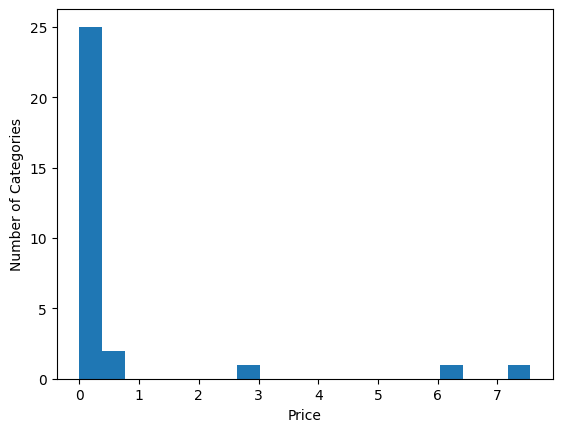

In [109]:
# Here we find the average price amongst unsaturated cateogories
# Lets create a histogram so that we can choose a logical market price
means = store_unsaturated.groupby('Category')['Price'].mean()
plt.hist(means, bins=20)
plt.xlabel("Price")
plt.ylabel('Number of Categories')
plt.show()

## Finding five categories with the lowest avg. ratings 

In [110]:
# Next we print which five application categories have the lowest avergage rating
mask = store_unsaturated.groupby('Category')['Rating'].mean()
mask = mask.sort_values(ascending=True)
print(mask.iloc[: 5])

Category
DATING                 3.970769
MAPS_AND_NAVIGATION    4.051613
VIDEO_PLAYERS          4.063750
LIFESTYLE              4.094904
TRAVEL_AND_LOCAL       4.109292
Name: Rating, dtype: float64


## Here we continue to filter categories that have low installations
### After inspection of the graph below we find that  'Travel and Local' and 'Video Players' have relativey high number of installations.
### They will be excluded from our category recommendations

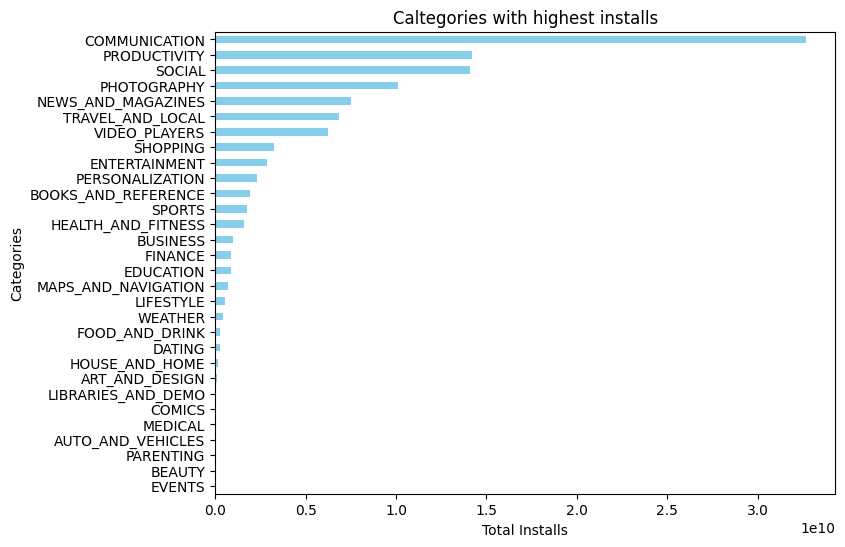

In [111]:
top_5_category_installs = store_unsaturated.groupby('Category')['Installs'].sum().sort_values(ascending=False)
top_5_category_installs = top_5_category_installs[::-1]

plt.figure(figsize=(8,6))
top_5_category_installs.plot(kind='barh', color='skyblue')
plt.title('Caltegories with highest installs')
plt.xlabel('Total Installs')
plt.ylabel('Categories')
plt.show()

## Here we analyze the distribution of Content Rating across categories

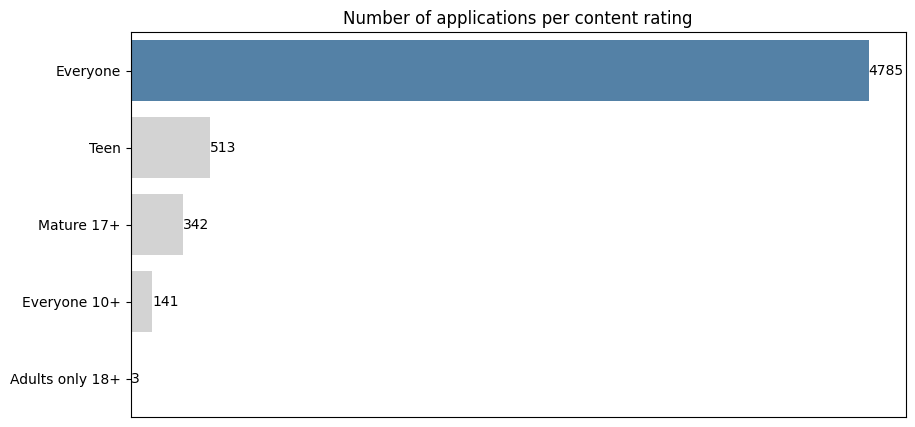

In [112]:
content = store_unsaturated['Content Rating'].value_counts()

top1_cat = category.index[:1]
colors = ['steelblue' if cat in top1_cat else 'lightgray' for cat in category.index]


# Plot
plt.figure(figsize=(10,5))
sns.barplot(y=content.index,x=content.values, orient='h', palette=colors)

for index, value in enumerate(content.values):
    plt.text(value, index, str(value), fontsize=10, va='center')

plt.title('Number of applications per content rating', size=12)
plt.ylabel('')
plt.yticks(fontsize=10)
plt.xticks([])

plt.show()

## Here we investigate the distribution of application type ('Free' or 'Paid')

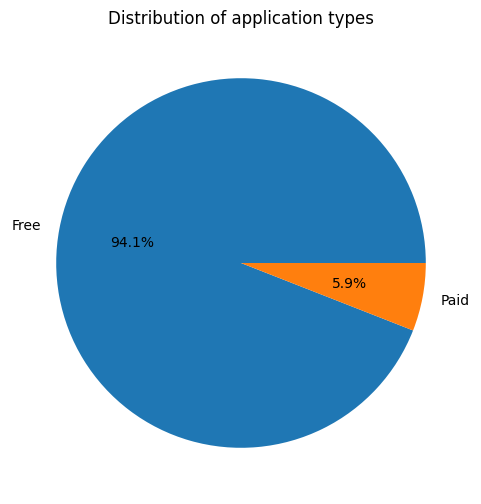

In [113]:
plt.figure(figsize=(6, 6))
value_counts = store_unsaturated['Type'].value_counts()

plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of application types')
plt.show()

## 

## Here we create a scatter graph showing us app size vs. rating

### We find that the majority of apps in the dataset are smaller in size
### We can also see that smaller size apps shows more top rating achivement rather large size apps 

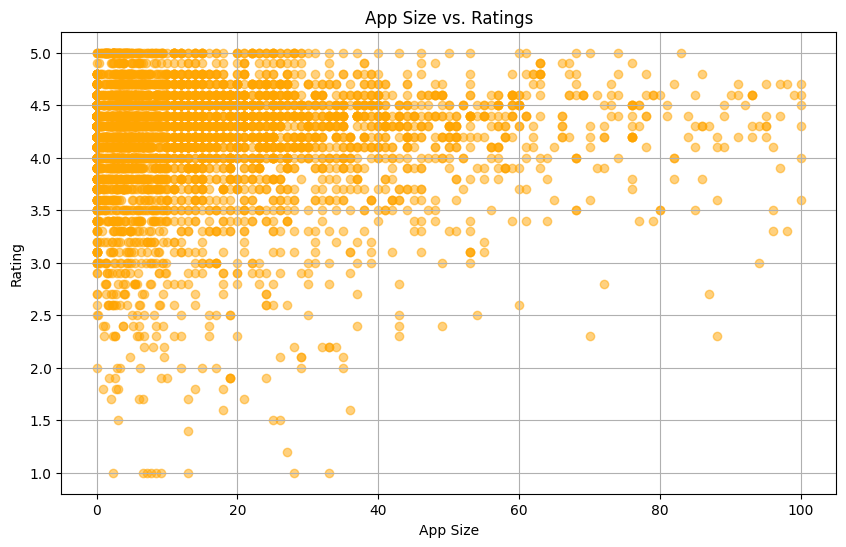

In [114]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(store_unsaturated['Size'], store_unsaturated['Rating'], alpha=0.5, color='orange')
plt.title('App Size vs. Ratings')
plt.xlabel('App Size')
plt.ylabel('Rating')
plt.grid(True)

plt.show()


## Here we create a word cloud from application name to help us with branding

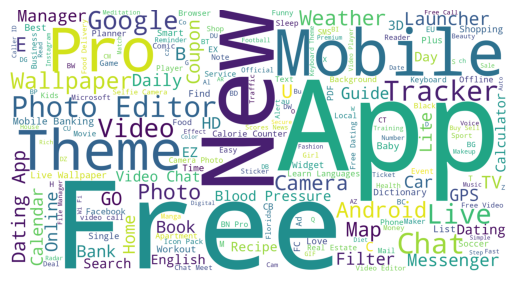

In [115]:
wordcloud = WordCloud(width=1900,
                      height=1000,
                      stopwords=STOPWORDS,
                      background_color='white').generate(" ".join(store_unsaturated['App']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Conclusion
In this data analysis outcome, we can confidently guide our entreprenuer on how to invest using the following steps:

- Categories to invest in should be 'DATING', 'MAPS_AND_NAVIGATION' and 'LIFESTYLE'
- Price should be between 0 and 1 dollars
- Content rating should be 'Everyone'
- Size should be between 0 and 20 mb.
- Popular words derived from application names are 'Free', 'App', 'New', 'Pro', Mobile', 'Theme', 'Chat', 'Photo Editor', 'Tracker', 'Google'and more.